# Projeto 2 - Fabio Ferreira, Joras Oliveira e José Fernandes

Nosso modelo consiste em colocar um copo de água, cuja temperatura é de 90°C, em um freezer, cujo ar possui temperatura inicial de -19°C.
<img src="corte_lateral_do_modelo.jpg" width=400 height=300 align="left">
<img src="diagrama.jpeg" width=500 height=300 align="right">

**Importando bibliotecas**

In [123]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import math

**Definindo os parâmetros**

In [124]:
p = 150
e = 0.77 #Eficiência do motor (77%)

Densagua = 997 #Densidade da água (Kg/m^3)
Magua = Densagua*0.0003 #Massa da água no copo (Kg)
Cagua = 4220 #Calor específico da água (J/Kg*K) 
Mar = 0.81 #Massa de ar no freezer (Kg)
Car = 1005 #Calor específico do ar (J/Kg*K)

T0agua = 363.15 #Temperatura inicial do ar (K)
T0ar = 254.15 #Temperatura inicial da água (K)
t = [T0agua, T0ar] 
Tamb = 298.15 #Temperatura do ambiente (K)

r1 = 0.037 #raio interno do copo (m)
r2 = 0.040 #raio externo do copo (m)
As = math.pi*(r1**2) #Area da superfície(m)
Ac = (2*(math.pi)*r2*0.012) + As  #Area do copo (m)
Areaintparede = (0.45 * 0.45 * 2) + (1 * 0.5 * 4) #(m)
Areaextparede = (0.5 * 0.5 * 2) + (1 * 0.5 * 4) #(m)
a = [Areaintparede, Areaextparede] #Area interna e externa da parede
Dparede = 0.05 #Espessura da parede (m)


h = 50 #Coeficiente de transferencia convectiva da água (W/m^2*K)
Kc = 0.02 #Coeficiente de condutividade térmica do copo(W/m*K)
Kp = 0.05 #Coeficiente de condutividade térmica da parede(W/m*K)

**Calculando as resistências térmicas**

In [125]:
R = math.log(r2/r1)/(Kp * 0.12 * 2 *math.pi)
res = 1/(h * Ac)
res1 = 1/(h * Areaintparede)
res2 = Dparede/(Kp * Areaintparede)
res3 = 1/(h * Areaextparede)

**Criando a função do modelo**

In [126]:
def modelo(T, t): 
    Tagua = T[0]
    Tar = T[1]
    q1 = h * As * (Tagua - Tar)
    q2 = (Tagua - Tar) / (res + R)            
    qp = (Tamb - Tar) / (res1 + res2 + res3)
    qm = p* e
    
    dtAguadT = 1/(Magua * Cagua)*(-q1 - q2)
    dtArdT = 1/(Mar * Car)*(q1 + q2 + qp - qm)
    dxdt = [dtAguadT,dtArdT]
    
    return dxdt

**Resolvendo o modelo e plotando o gráfico**

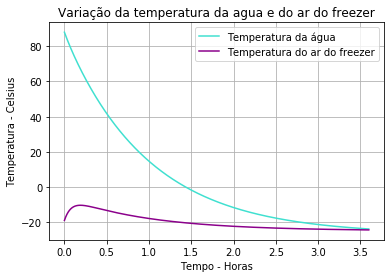

In [127]:
#Criando a lista de tempo
deltaT = 1
tempo = np.arange(1, 12960, deltaT) #3h e 30min 

#Resolvendo o modelo
solucao = odeint(modelo, t, tempo)

#Plotando o gráfico
plt.plot(tempo/3600, solucao[:,0]-275.15, "turquoise", label = "Temperatura da água")
plt.plot(tempo/3600, solucao[:,1]-273.15, "darkmagenta",  label ='Temperatura do ar do freezer')
plt.xlabel("Tempo - Horas")
plt.ylabel("Temperatura - Celsius")
plt.title("Variação da temperatura da agua e do ar do freezer")
plt.grid(True)
plt.legend()
plt.show()

**Dados de validação**

In [128]:
Tempagua = [88.50, 0.50] #Temperatura inicial da água/Temperatura final da água
Tempar = [-19, -19] #Temperatura inicial do ar/Temperatura final do ar

tempovalidacao = [0, 1.35] #Tempo da validação (h)

**Gráfico comparativo entre validação e modelo**

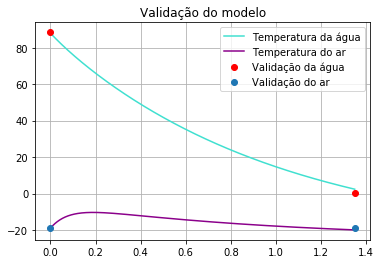

In [129]:
tval = np.arange(0, 4860, 1)

validacao = odeint(modelo, t, tval)

plt.plot(tval/3600, validacao[:,0]-275.15, "turquoise", label = "Temperatura da água")
plt.plot(tval/3600, validacao[:,1]-273.15, "darkmagenta",  label ='Temperatura do ar')
plt.plot(tempovalidacao, Tempagua, 'ro', label ='Validação da água')
plt.plot(tempovalidacao, Tempar, 'o', label ='Validação do ar')
plt.title("Validação do modelo")
plt.legend()
plt.grid(True)
plt.show()


# **Perguntas e Gráficos Conclusivos**

**Primeira pergunta: De que forma as dimensões do copo alteram a temperatura final da água após três horas?**

Definindo os diferentes volumes do copo, massas da agua e novo intervalo de tempo:

In [130]:
#Primeira pergunta
AltC = 0.12 #altura do copo em metros

Re = [0.045, 0.050, 0.055, 0.060, 0.065, 0.070, 0.075, 0.080, 0.085, 0.090] # diferentes dimensoes para o raio externo
Ri = []  # raio interno

Ma = []  #massa de agua no copo

deltaT = 1
tempo = np.arange(1, 1800, deltaT) #30min 

valores = []  #os valores que teremos no final

for r in Re:
    Ri.append(r-0.003) #o raio interneo = o raio externo - a espessura do copo

for r in Ri:
    v = (r * math.pi*AltC)*10**-2
    Ma.append(v*Densagua) #calculando a massa da água para cada dimensao do copo

**calculando a pergunta 1 e plotando o grafico**


In [131]:
#novo modelo:
def modelo2(T, t, R, Magua): 
    Tagua = T[0]
    Tar = T[1]
    
    q1 = h * As * (Tagua - Tar)
    q2 = (Tagua - Tar) / (res + R)            
    qp = (Tamb - Tar) / (res1 + res2 + res3)
    qm = p* e
    
    dtAguadT = 1/(Magua * Cagua)*(-q1 - q2)
    dtArdT = 1/(Mar * Car)*(q1 + q2 + qp - qm)
    dxdt = [dtAguadT,dtArdT]
    
    return dxdt

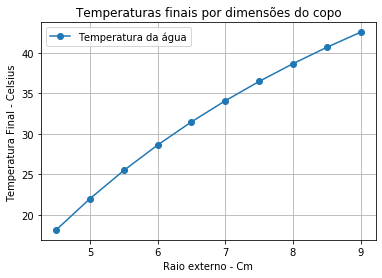

In [132]:
for n in range(10):
    R2 = math.log(Re[n]/Ri[n])/(Kp * 0.12 * 2 *math.pi) #recalulando o R para o modelo
    Magua2 = Ma[n] #redefinindo o valor de Magua no modelo
    
    result = odeint(modelo2, t, tempo, args=(R2, Magua2))
    k = result[:,0]
    valores.append((k[-1] - 273.15)) # colocando a temperatura final na lista, convertendo para celcius, 

Re = [i * 100 for i in Re]


plt.plot(Re, valores, 'o-', label = "Temperatura da água",)
plt.xlabel("Raio externo - Cm")
plt.ylabel("Temperatura Final - Celsius ")
plt.title("Temperaturas finais por dimensões do copo")
plt.grid(True)
plt.legend()
plt.show()

**Segunda Pergunta: Alterar a massa de água interfere no tempo para a temperatura da agua atingir 0˚C?**

Redefinindo os valores mudados para o calculo da primeira pergunta, de volta para os valores originais

In [133]:
step = 0.025
Ma2 = np.arange(0.025, 0.325, step)
zero = []
deltaT = 1
tempo = np.arange(1, 86400, deltaT) #48h 

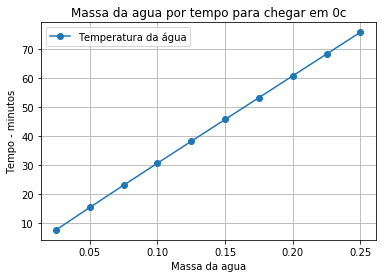

In [134]:
n = 0
for n in range(10):
    Magua2 = Ma2[n] #redefinindo o valor de Magua no modelo
    result = odeint(modelo2, t, tempo, args=(R,Magua2))
    temperaturas = (result[:,0]-273.15)
    
    for i in range(len(tempo) - 1):
        if temperaturas[i] <= 0:
            zero.append(tempo[i])
            break
            
    n+=1    
    

Ma2 = Ma2.tolist()
Ma2.pop(-1)
Ma2.pop(-1)

zero = [i /60 for i in zero]

plt.plot(Ma2, zero, 'o-', label = "Temperatura da água",)
plt.xlabel("Massa da agua")
plt.ylabel("Tempo - minutos")
plt.title("Massa da agua por tempo para chegar em 0c")
plt.grid(True)
plt.legend()
plt.show()

**Terceira Pergunta: Como diferentes eficiências do motor alteram o tempo de equilíbrio do modelo?**

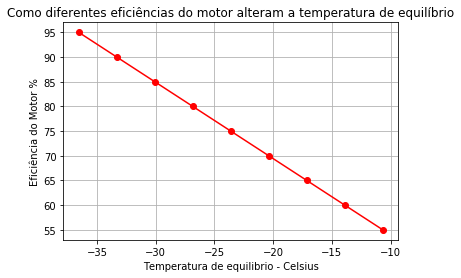

In [135]:
efi = np.arange(0.55, 1, 0.05)
tempo2 = np.arange(0, 80000000, 1)

def modelo3(T, t, e): 
    Tagua = T[0]
    Tar = T[1]
    
    q1 = h * As * (Tagua - Tar)
    q2 = (Tagua - Tar) / (res + R)            
    qp = (Tamb - Tar) / (res1 + res2 + res3)
    qm = p* e
    
    dtAguadT = 1/(Magua * Cagua)*(-q1 - q2)
    dtArdT = 1/(Mar * Car)*(q1 + q2 + qp - qm)
    dxdt = [dtAguadT,dtArdT]
    
    return dxdt

tempoequi = []

for i in range(len(efi)):
    solucao3 = odeint(modelo3, t, tempo2, args=(efi[i],))
    tempagua2 = solucao3[:,0]
    tempar2 = solucao3[:,1]
    
    for e in range(len(tempagua2)):
        if tempagua2[e] == tempar2[e]:
            tempoequi.append((tempagua2[e]-273.15))
            break

eficiencia = [e * 100 for e in efi]

plt.plot(tempoequi, eficiencia, 'r-o')
plt.title('Como diferentes eficiências do motor alteram a temperatura de equilíbrio')
plt.xlabel('Temperatura de equilibrio - Celsius')
plt.ylabel('Eficiência do Motor %')
plt.grid(True)
plt.show()